In [1]:
import pyforest

In [2]:
file_path = '/Users/jagadish/Desktop/extended_fmcg_demand_forecasting.csv'
df = pd.read_csv(file_path)

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1000 non-null   object 
 1   Product_Category         1000 non-null   object 
 2   Sales_Volume             1000 non-null   int64  
 3   Price                    1000 non-null   float64
 4   Promotion                1000 non-null   int64  
 5   Store_Location           1000 non-null   object 
 6   Weekday                  1000 non-null   int64  
 7   Supplier_Cost            1000 non-null   float64
 8   Replenishment_Lead_Time  1000 non-null   int64  
 9   Stock_Level              1000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Sales_Volume,Price,Promotion,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1048.781000,10.362358,0.491000,2.999000,7.552047,4.970000,266.494000
std,539.688298,5.420627,0.500169,2.001751,4.163729,2.589944,130.560078
min,101.000000,1.003580,0.000000,0.000000,0.500445,1.000000,50.000000
25%,591.750000,5.541108,0.000000,1.000000,3.887763,3.000000,152.000000
50%,1064.500000,10.404366,0.000000,3.000000,7.422058,5.000000,260.000000
75%,1489.000000,15.054035,1.000000,5.000000,11.099853,7.000000,376.000000
max,1997.000000,19.944485,1.000000,6.000000,14.993587,9.000000,499.000000


In [6]:
print(df.isnull().sum())


Date                       0
Product_Category           0
Sales_Volume               0
Price                      0
Promotion                  0
Store_Location             0
Weekday                    0
Supplier_Cost              0
Replenishment_Lead_Time    0
Stock_Level                0
dtype: int64


In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, set invalid entries to NaT
print("\nColumn Data Types After Conversion:")
print(df.dtypes)

<IPython.core.display.Javascript object>


Column Data Types After Conversion:
Date                       datetime64[ns]
Product_Category                   object
Sales_Volume                        int64
Price                             float64
Promotion                           int64
Store_Location                     object
Weekday                             int64
Supplier_Cost                     float64
Replenishment_Lead_Time             int64
Stock_Level                         int64
dtype: object


In [8]:
data= df.drop_duplicates()
print("\nNumber of rows after removing duplicates:", len(data))


Number of rows after removing duplicates: 1000


In [9]:

df = df.sort_values(by='Date')
print("\nData sorted by date.")
# Create a new column for Year-Month (e.g., '2022-01')
df['YearMonth'] = df['Date'].dt.to_period('M')
# Group by 'YearMonth' and sum up 'Sales_Volume'
monthly_sales = df.groupby('YearMonth')['Sales_Volume'].sum().reset_index()
monthly_sales.rename(columns={'YearMonth': 'Month', 'Sales_Volume': 'Total_Sales_Volume'}, inplace=True)
print("\nMonthly aggregated sales data:")
print(monthly_sales.head())




Data sorted by date.

Monthly aggregated sales data:
     Month  Total_Sales_Volume
0  2022-01               39416
1  2022-02               29172
2  2022-03               29524
3  2022-04               28947
4  2022-05               33900


In [11]:
#monthly_sales = pd.read_csv('monthly_sales_data.csv')
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'].astype(str))
monthly_sales = monthly_sales.set_index('Month')
monthly_sales['Rolling_Mean'] = monthly_sales['Total_Sales_Volume'].rolling(window=3).mean()  # 3-month rolling average
print("\nMonthly sales data with rolling averages:")
print(monthly_sales)


<IPython.core.display.Javascript object>


Monthly sales data with rolling averages:
            Total_Sales_Volume  Rolling_Mean
Month                                       
2022-01-01               39416           NaN
2022-02-01               29172           NaN
2022-03-01               29524  32704.000000
2022-04-01               28947  29214.333333
2022-05-01               33900  30790.333333
2022-06-01               34582  32476.333333
2022-07-01               28229  32237.000000
2022-08-01               33209  32006.666667
2022-09-01               28833  30090.333333
2022-10-01               35578  32540.000000
2022-11-01               29380  31263.666667
2022-12-01               33124  32694.000000
2023-01-01               33138  31880.666667
2023-02-01               30477  32246.333333
2023-03-01               32328  31981.000000
2023-04-01               33040  31948.333333
2023-05-01               26594  30654.000000
2023-06-01               33686  31106.666667
2023-07-01               36541  32273.666667
2023-08-01  

In [12]:
trend_file_path = 'monthly_sales_with_trends.csv'
monthly_sales.to_csv(trend_file_path)
print(f"\nTrends saved to: {trend_file_path}")



Trends saved to: monthly_sales_with_trends.csv


In [13]:
monthly_sales = pd.read_csv('monthly_sales_with_trends.csv')
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

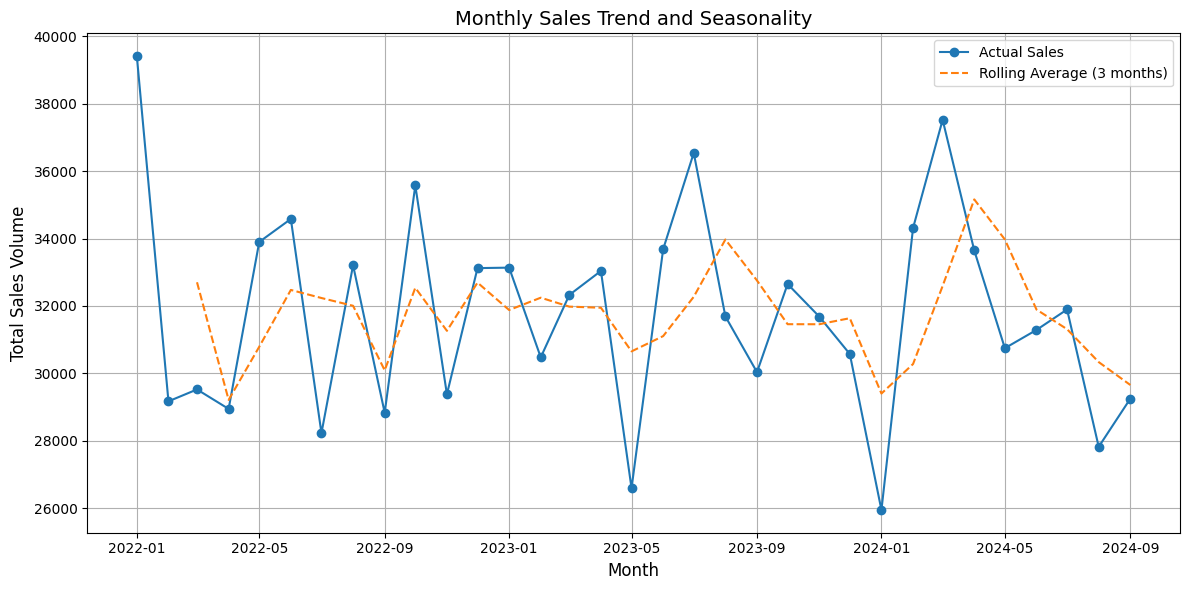

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total_Sales_Volume'], label='Actual Sales', marker='o')
plt.plot(monthly_sales['Month'], monthly_sales['Rolling_Mean'], label='Rolling Average (3 months)', linestyle='--')
plt.title('Monthly Sales Trend and Seasonality', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
print("\nPlotted DataFrame:")
print(monthly_sales)


Plotted DataFrame:
        Month  Total_Sales_Volume  Rolling_Mean
0  2022-01-01               39416           NaN
1  2022-02-01               29172           NaN
2  2022-03-01               29524  32704.000000
3  2022-04-01               28947  29214.333333
4  2022-05-01               33900  30790.333333
5  2022-06-01               34582  32476.333333
6  2022-07-01               28229  32237.000000
7  2022-08-01               33209  32006.666667
8  2022-09-01               28833  30090.333333
9  2022-10-01               35578  32540.000000
10 2022-11-01               29380  31263.666667
11 2022-12-01               33124  32694.000000
12 2023-01-01               33138  31880.666667
13 2023-02-01               30477  32246.333333
14 2023-03-01               32328  31981.000000
15 2023-04-01               33040  31948.333333
16 2023-05-01               26594  30654.000000
17 2023-06-01               33686  31106.666667
18 2023-07-01               36541  32273.666667
19 2023-08-01       

In [16]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Load the data
monthly_sales = pd.read_csv('monthly_sales_with_trends.csv')
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])  # Ensure Month is datetime
monthly_sales = monthly_sales.set_index('Month')  # Set Month as the index

# Define the ARIMA model parameters (p, d, q)
# p = order of AR, d = differencing, q = order of MA
model = ARIMA(monthly_sales['Total_Sales_Volume'], order=(1, 1, 1))
fitted_model = model.fit()

forecast_steps = 12  # Forecast for the next 12 months
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_df = pd.DataFrame({
    'Month': pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(), periods=forecast_steps, freq='MS'),
    'Forecasted_Sales': forecast
})

historical_data = monthly_sales.reset_index()[['Month', 'Total_Sales_Volume']]
forecast_combined = pd.concat([
    historical_data.rename(columns={'Total_Sales_Volume': 'Sales'}),
    forecast_df.rename(columns={'Forecasted_Sales': 'Sales'})
])

forecast_file_path = 'sales_forecast.csv'
forecast_combined.to_csv(forecast_file_path, index=False)
print(f"\nForecast saved to: {forecast_file_path}")

# Display forecasted data
print("\nForecasted DataFrame:")
print(forecast_combined)



Forecast saved to: sales_forecast.csv

Forecasted DataFrame:
                         Month         Sales
0                   2022-01-01  39416.000000
1                   2022-02-01  29172.000000
2                   2022-03-01  29524.000000
3                   2022-04-01  28947.000000
4                   2022-05-01  33900.000000
5                   2022-06-01  34582.000000
6                   2022-07-01  28229.000000
7                   2022-08-01  33209.000000
8                   2022-09-01  28833.000000
9                   2022-10-01  35578.000000
10                  2022-11-01  29380.000000
11                  2022-12-01  33124.000000
12                  2023-01-01  33138.000000
13                  2023-02-01  30477.000000
14                  2023-03-01  32328.000000
15                  2023-04-01  33040.000000
16                  2023-05-01  26594.000000
17                  2023-06-01  33686.000000
18                  2023-07-01  36541.000000
19                  2023-08-01  31691.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


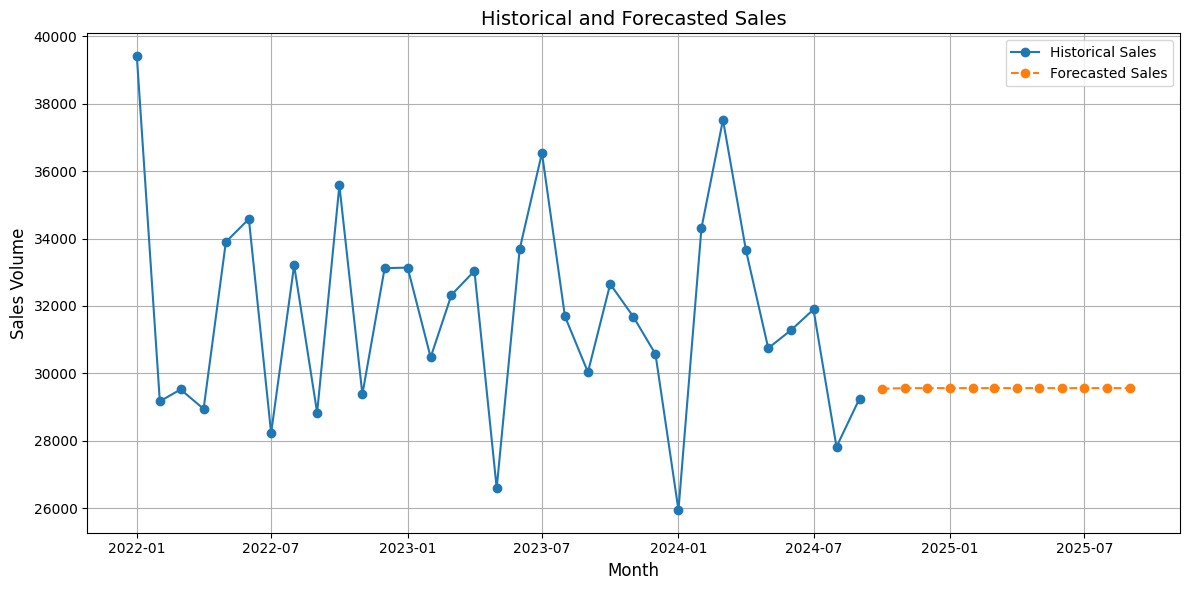


Historical and Forecasted DataFrame:
        Month         Sales
0  2022-01-01  39416.000000
1  2022-02-01  29172.000000
2  2022-03-01  29524.000000
3  2022-04-01  28947.000000
4  2022-05-01  33900.000000
5  2022-06-01  34582.000000
6  2022-07-01  28229.000000
7  2022-08-01  33209.000000
8  2022-09-01  28833.000000
9  2022-10-01  35578.000000
10 2022-11-01  29380.000000
11 2022-12-01  33124.000000
12 2023-01-01  33138.000000
13 2023-02-01  30477.000000
14 2023-03-01  32328.000000
15 2023-04-01  33040.000000
16 2023-05-01  26594.000000
17 2023-06-01  33686.000000
18 2023-07-01  36541.000000
19 2023-08-01  31691.000000
20 2023-09-01  30037.000000
21 2023-10-01  32652.000000
22 2023-11-01  31687.000000
23 2023-12-01  30575.000000
24 2024-01-01  25947.000000
25 2024-02-01  34314.000000
26 2024-03-01  37524.000000
27 2024-04-01  33648.000000
28 2024-05-01  30748.000000
29 2024-06-01  31290.000000
30 2024-07-01  31897.000000
31 2024-08-01  27822.000000
32 2024-09-01  29251.000000
33 2024-10

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Load the forecast data
forecast_combined = pd.read_csv('sales_forecast.csv')
forecast_combined['Month'] = pd.to_datetime(forecast_combined['Month'])  # Ensure Month is datetime


historical_data = forecast_combined[forecast_combined['Month'] <= pd.to_datetime('2024-09-01')]
forecasted_data = forecast_combined[forecast_combined['Month'] > pd.to_datetime('2024-09-01')]

#Plot historical and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Month'], historical_data['Sales'], label='Historical Sales', marker='o')
plt.plot(forecasted_data['Month'], forecasted_data['Sales'], label='Forecasted Sales', marker='o', linestyle='--')
plt.title('Historical and Forecasted Sales', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Display the combined DataFrame for reference
print("\nHistorical and Forecasted DataFrame:")
print(forecast_combined)


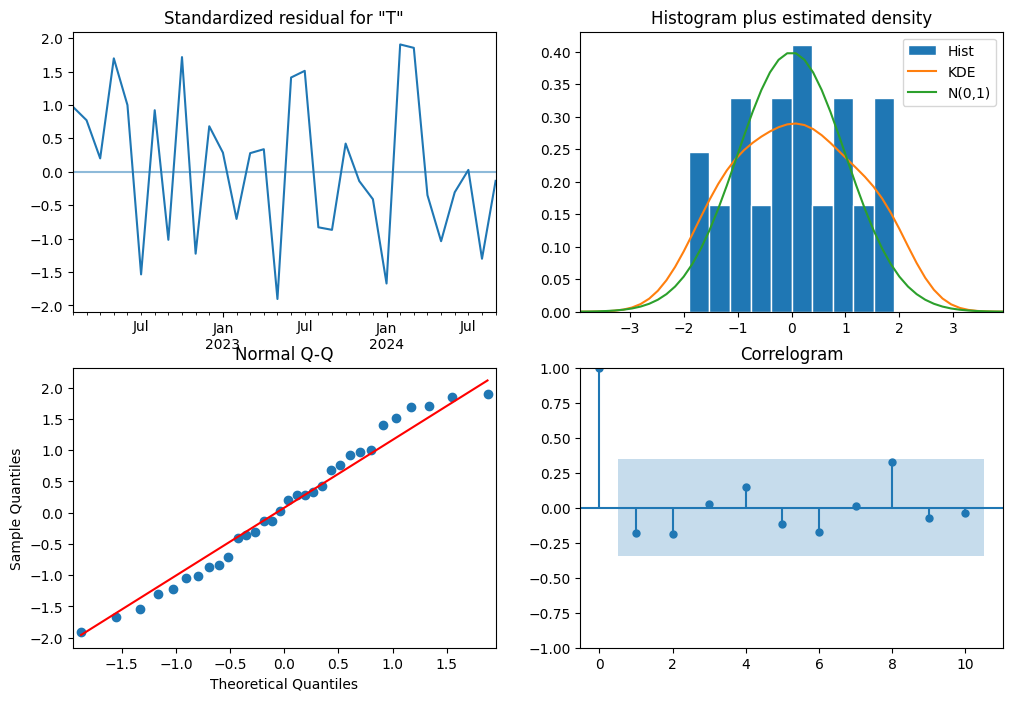

In [18]:
# Check model diagnostics
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()
